<a href="https://colab.research.google.com/github/AhmadRafif22/PCVK_Genap_2023/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IDENTITAS MAHASISWA

Nama : Ahmad Rafif Alaudin

Kelas : TI 3G

Nim : 2041720230

Absen : 02

# Jobsheet Pertemuan 10 - Traceholding

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import library yang dibutuhkan

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

### 3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.

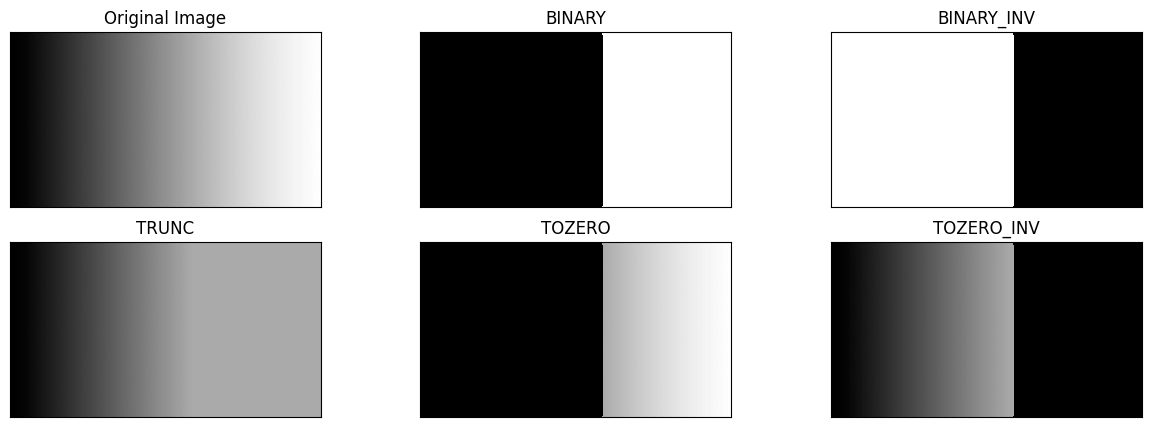

In [5]:
# import gambar gradient

gradient_img = ('/content/drive/MyDrive/Kuliah/Semester 6/lain lain/PVCK/image/gradient.jpg')
img = cv.imread(gradient_img) 
original = cv.imread(gradient_img) 
Binary = cv.imread(gradient_img) 
truncate = cv.imread(gradient_img) 
tozero = cv.imread(gradient_img) 
tozero_inverse = cv.imread(gradient_img) 

threshold_num = 170
    
#1. Original Image
original[img>threshold_num] = 255     
original[img<=threshold_num] = 0
#2. Binary threshold inverse 
Binary = 255 - original            
#3. Threshold Truncate 
truncate[img>threshold_num] = threshold_num        
#4. Threshold Tozero 
tozero[img<=threshold_num] = 0            
#5. Threshold Tozero Inverse 
tozero_inverse[img>threshold_num] = 0        

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV'] 
images = [img, original, Binary, truncate, tozero, tozero_inverse]


plt.figure(figsize = (15,5)) 
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest') 
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

### 4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

<ipython-input-6-83c855baa5f1>:19: RuntimeWarning: invalid value encountered in true_divide
  mb = sumb / wb


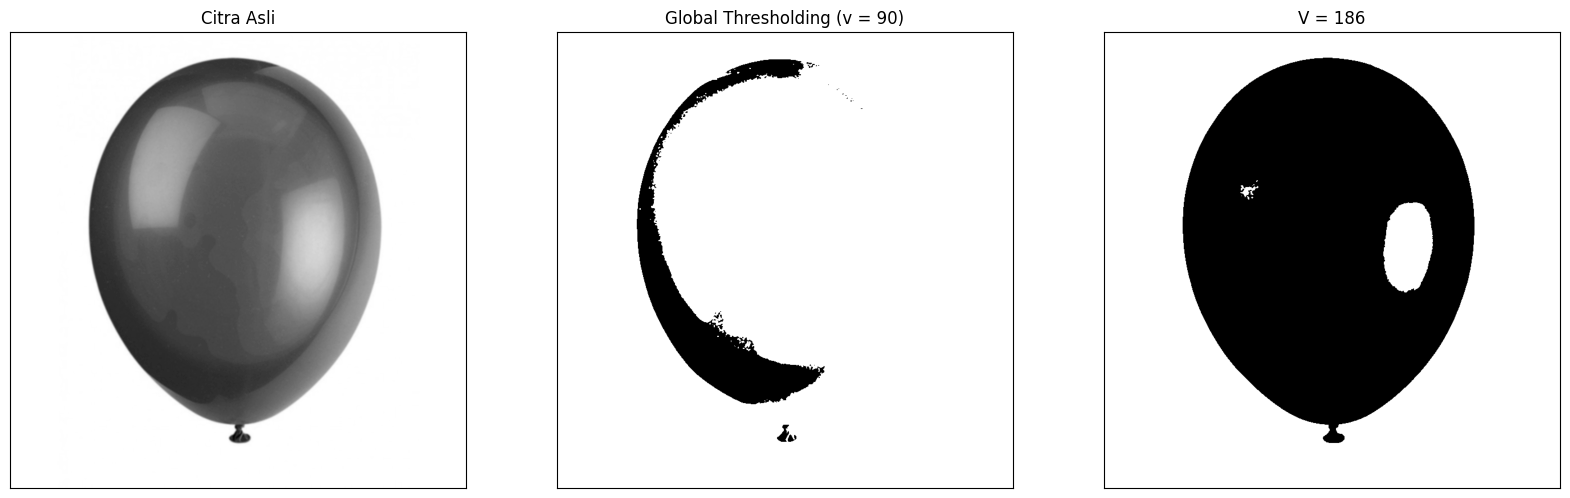

In [6]:
ballon_img = '/content/drive/MyDrive/Kuliah/Semester 6/lain lain/PVCK/image/balloon.jpg'
img = cv.imread(ballon_img, 0)
blur = cv.GaussianBlur(img, (5, 5), 0)

hist = cv.calcHist([blur], [0], None, [256], [0, 256])
hist_norm = hist.ravel() / hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
wb = 0
sumb = 0
varmax = 0
fn_min = float('inf')
thresh = -1

for i in range(0, 255):
    wb += hist[i]
    wf = (img.shape[0] * img.shape[1]) - wb
    sumb += (i * hist[i])
    mb = sumb / wb
    mf = (sumb - sumb) / wf
    betweenvar = wb * wf * (mb - mf) * (mb - mf)
    if (betweenvar > varmax):
        varmax = betweenvar
        thresh = i

x = "V = 186"
ret, th1 = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)
ret, th2 = cv.threshold(blur, 186, 255, cv.THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, th2]

plt.figure(figsize=(20, 15))
for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

### 5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images. Petunjuk:

1. anda dapat gunakan cv.calcHist untuk menampilkan histogram. 
2. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html 
3. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter 
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung 
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang 
dimasking warna putih yang akan dihitung histogramnya (dari contoh 
dibawah dinamakan dengan Citra Segment). 

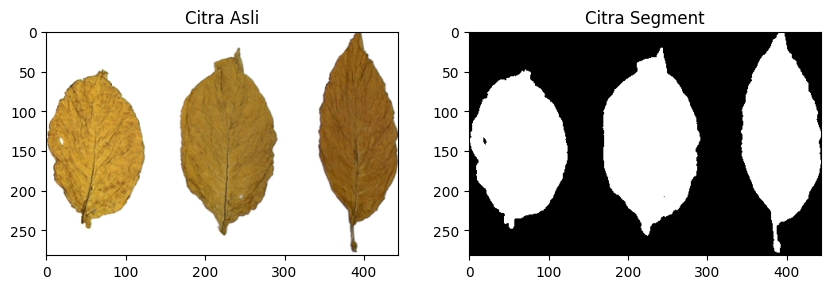

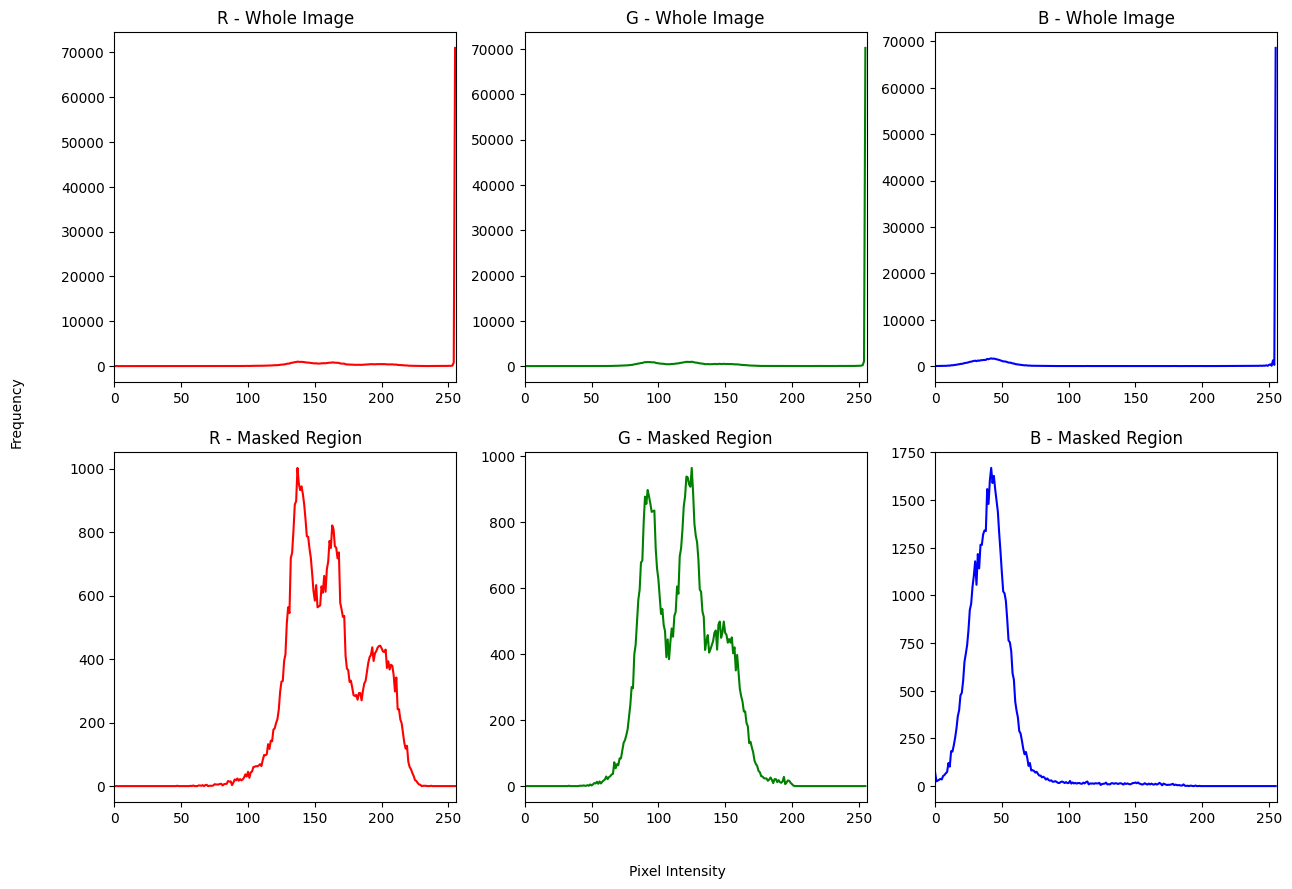

In [11]:
# load the image in BGR format
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/lain lain/PVCK/image/tobacco.jpg')

# convert BGR image to RGB
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# convert RGB image to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

# apply thresholding to create a binary mask
_, mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)

# plot the original image and the binary mask
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axs[0].imshow(img)
axs[0].set_title('Citra Asli')
axs[1].imshow(mask, cmap='gray')
axs[1].set_title('Citra Segment')

# plot histograms for each color channel
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# iterate over each color channel (R,G,B)
for i, color in enumerate(('r', 'g', 'b')):
    # calculate histogram for the whole image
    hist_all = cv.calcHist([img], [i], None, [256], [0, 256])

    # calculate histogram for the masked region
    hist_masked = cv.calcHist([img], [i], mask, [256], [0, 256])

    # plot the histograms for the whole image and the masked region
    axs[0,i].plot(hist_all, color=color)
    axs[0,i].set_xlim([0, 256])
    axs[0,i].set_title(f'{color.upper()} - Whole Image')
    axs[1,i].plot(hist_masked, color=color)
    axs[1,i].set_xlim([0, 256])
    axs[1,i].set_title(f'{color.upper()} - Masked Region')

# set common labels for the histograms
fig.text(0.5, 0.04, 'Pixel Intensity', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')

# display the plot
plt.show()

### 6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

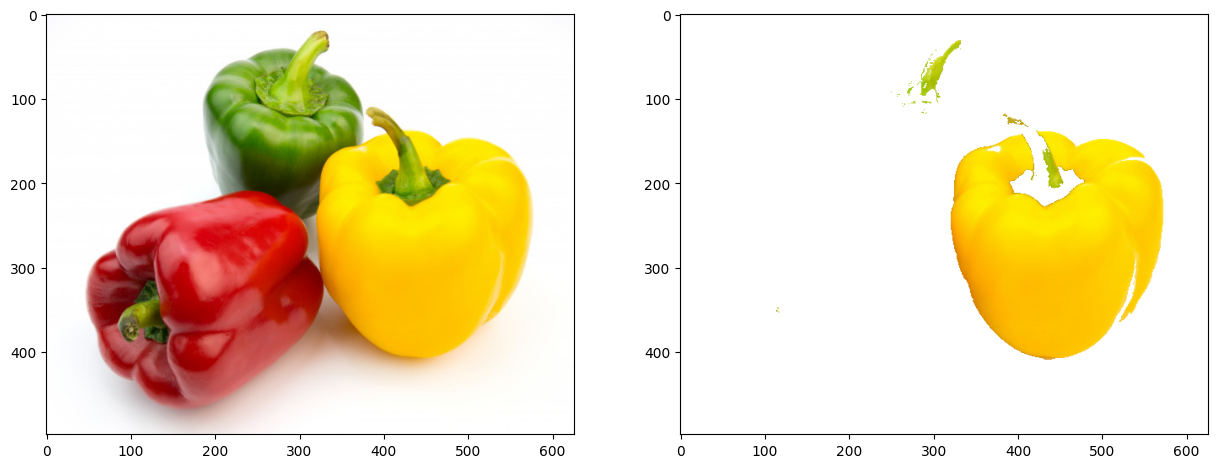

In [17]:
filename = ('/content/drive/MyDrive/Kuliah/Semester 6/lain lain/PVCK/image/peppers.jpg')

img = cv.imread(filename) 
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3)) 
pixel_values = np.float32(pixel_values)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 6 
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
labels = labels.flatten()

masked_image = np.copy(img) 
masked_image0= masked_image.reshape((-1, 3)) 
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)

plt.figure(figsize = (15,12)) 
plt.subplot(2,2,1),plt.imshow(img) 
plt.subplot(2,2,2),plt.imshow(masked_image0) 

plt.show()

Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa hal itu terjadi. 

> kendala yang terjadi adalah hasil output yang diinginkan tidak dapat langsung diperoleh, diperlukan beberapa iterasi untuk menjalankan program sampai akhirnya diperoleh hasil yang diinignkan. hal ini terjadi karena K-Means merupakan metode clustering, sehingga pengelompokan dilakukan tanpa adanya label, sehingga perlu berulangkali di run agar mendapatkan kelompok yang kita inginkan.